# __Modelo de Machine Learning__

##### DATO IMPORTANTE!  Antes de correr cada modelo vuelva a correr el codigo para traer el dataframe DF de la base de datos.

In [55]:
#Descargamos el mysql connector
#pip install mysql-connector-python
#pip install tensorflow.keras

In [224]:
import pandas as pd
import mysql.connector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import streamlit as st
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping



### __Conexion con la base de datos mysql en AWS RDS__

In [217]:
# Crear la conexión
cnx = mysql.connector.connect(
    host='db-latambrain-luis-mysql.ckwcpsorcjut.us-east-2.rds.amazonaws.com',
    user='admin',
    password='zGqS4YymBH9jsMOEFxoG',
    database='sys'
)

In [218]:
# Ejecutar una consulta SQL y guardar los resultados en un DataFrame de Pandas
query = "SELECT * FROM JobKaggle"
df = pd.read_sql(query, cnx)

C:\Users\matia\AppData\Local\Temp\ipykernel_10540\3149902286.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [219]:
cnx.close()

In [51]:
df #Revisamos la base de datos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Column1
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,2
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,3
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,4
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,602
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,603
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,604
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,605


In [52]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Column1
76,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M,76
294,2022,MI,FT,Data Engineer,170000,USD,170000,US,100,US,M,294
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L,256
368,2022,EX,FT,Analytics Engineer,135000,USD,135000,US,100,US,M,368
564,2022,SE,FT,Data Analyst,116150,USD,116150,US,100,US,M,564


##### _Este código utiliza el aprendizaje profundo (deep learning) para construir un modelo que pueda predecir el salario de un empleado en función de varias características, como su nivel de experiencia, tipo de empleo, título laboral, ubicación y tamaño de la empresa, entre otros. El modelo utilizado es una red neuronal artificial construida utilizando la librería Keras, que es una de las más populares para la construcción de modelos de aprendizaje profundo. El modelo es entrenado con datos de entrenamiento y validado con datos de prueba. Después de la formación, se evalúa el modelo utilizando la métrica de error cuadrático medio (MSE) y se realiza una predicción en un ejemplo de prueba._

### __Version 1 del modelo 1__

In [106]:

# Codificación one-hot para las variables categóricas
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'])

# Dividir el dataset en datos de entrenamiento y de prueba
X = df_encoded.drop('salary', axis=1).values
y = df_encoded['salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar la eficiencia del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilamos y entrenamos el modelo
model.compile(loss='mean_squared_error', optimizer=Adam()); model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluacion del modelo
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Hacemos una prediccion
prediction = model.predict(X_test[:1])
print("Prediction:", prediction)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 25655.0449
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 25398.7871
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 25108.9277
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 24747.7441
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 24298.1309
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 23722.4395
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 22967.3711
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 22006.8066
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 20795.2148
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 19326.1367
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 17622.4570
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 

### __Version 2 del modelo 1__

In [154]:

# Codificación one-hot para las variables categóricas
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'])

# Dividir el dataset en datos de entrenamiento y de prueba
X = df_encoded.drop('salary', axis=1).values
y = df_encoded['salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar la eficiencia del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam())

# Entrenar el modelo
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

# Evaluar el modelo
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Realizar una predicción
prediction1 = model.predict(X_test[:1])
print("Prediction:", prediction1)


Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 25351.4062
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 24991.2949
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 24505.0762
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 23818.6445
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 22845.5273
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 21406.7832
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 19381.8516
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 16656.2148
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 13342.6904
Epoch 10/200
8/8 [==============================] - 0s 4ms/step - loss: 9508.3262
Epoch 11/200
8/8 [==============================] - 0s 6ms/step - loss: 6337.9712
Epoch 12/200
8/8 [==============================] - 0s 4ms/step - loss: 4748.8545
Epoch 13/200
8/8

### __Version 3 del modelo 1__ [SELECCIONADO]

In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


# Codificación one-hot para las variables categóricas
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'])

# Dividir el dataset en datos de entrenamiento y de prueba
X = df_encoded.drop('salary', axis=1).values
y = df_encoded['salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar la eficiencia del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

# Evaluar el modelo
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)
# Realizar una predicción
prediction2 = model.predict(X_test[:1])
print("Prediction:", prediction)


2023-04-20 22:22:25.343 WARNING absl: `lr` is deprecated, please use `learning_rate` instead, or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.


Epoch 1/200
7/7 [==============================] - 2s 35ms/step - loss: 25477.0312 - val_loss: 27054.4355
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 25381.9219 - val_loss: 26998.4375
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 25340.7148 - val_loss: 26967.4707
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 25319.0410 - val_loss: 26934.4766
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 25276.4746 - val_loss: 26889.3809
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 25225.0137 - val_loss: 26823.0156
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 25150.1309 - val_loss: 26730.8809
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 25043.9707 - val_loss: 26600.0781
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 24897.7168 - val_loss: 26418.1680
Epoch 10/200
7/7 [==============================

### __Version 4 del modelo 1__

In [157]:

# Codificación one-hot para las variables categóricas
cat_vars = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
df_encoded = pd.get_dummies(df, columns=cat_vars)

# Dividir el dataset en datos de entrenamiento y de prueba
X = df_encoded.drop('salary', axis=1).values
y = df_encoded['salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar la eficiencia del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam())

# Entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2, callbacks=[early_stop])

# Evaluar el modelo
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Realizar una predicción
prediction = model.predict(X_test[:1])
print("Prediction:", prediction)

Epoch 1/100
7/7 [==============================] - 2s 40ms/step - loss: 25201.9648 - val_loss: 26538.8965
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 24791.5820 - val_loss: 26016.9609
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 24242.2852 - val_loss: 25260.4121
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 23384.4941 - val_loss: 24164.6719
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 22049.9023 - val_loss: 22581.8652
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 20136.1230 - val_loss: 20390.6875
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 17404.0410 - val_loss: 17546.2109
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 13987.5635 - val_loss: 14217.1045
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 10221.1084 - val_loss: 10846.9033
Epoch 10/100
7/7 [==============================] - 0

### ___MODELO 1 QUE DICE SI EL PRECIO ES ALTO O BAJO___

In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


# Codificación one-hot para las variables categóricas
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'])

# Dividir el dataset en datos de entrenamiento y de prueba
X = df_encoded.drop('salary', axis=1).values
y = df_encoded['salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar la eficiencia del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

# Evaluar el modelo
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Realizar una predicción
prediction2 = model.predict(X_test[:1])
print("Prediction2:", prediction)

# Clasificar el salario
salary = y_test[:1][0]
if salary > 80000:
    print("El salario es alto")
elif salary > 50000:
    print("El salario es medio")
else:
    print("El salario es promedio")

2023-04-20 23:08:30.733 `lr` is deprecated, please use `learning_rate` instead, or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 35796.6094 - val_loss: 39860.8242
Epoch 2/200
1/1 [==============================] - 0s 39ms/step - loss: 35771.9688 - val_loss: 39858.8594
Epoch 3/200
1/1 [==============================] - 0s 42ms/step - loss: 35777.4961 - val_loss: 39856.8164
Epoch 4/200
1/1 [==============================] - 0s 40ms/step - loss: 35777.9258 - val_loss: 39854.6055
Epoch 5/200
1/1 [==============================] - 0s 37ms/step - loss: 35764.0273 - val_loss: 39852.4648
Epoch 6/200
1/1 [==============================] - 0s 37ms/step - loss: 35739.5234 - val_loss: 39850.3438
Epoch 7/200
1/1 [==============================] - 0s 41ms/step - loss: 35736.8633 - val_loss: 39846.7539
Epoch 8/200
1/1 [==============================] - 0s 95ms/step - loss: 35709.7891 - val_loss: 39842.2461
Epoch 9/200
1/1 [==============================] - 0s 46ms/step - loss: 35738.3516 - val_loss: 39837.1523
Epoch 10/200
1/1 [==============================

### __Version 2 del Modelo 2__

In [216]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [214]:

# Agarramos las columnas que vamos a utilizar y codificamos las ubicaciones de las empresas
df = df[['company_location', 'salary']]
le = LabelEncoder()
df['company_location'] = le.fit_transform(df['company_location'])

# Separar los datos de entrada y salida
X = df.iloc[:, :-1].values; y = df.iloc[:, -1].values

# Entrenamos el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predecir los ingresos promedio por ubicación
locations = le.transform(['US', 'GB', 'DE', 'FR', 'CA'])
predicted_salaries = model.predict(locations.reshape(-1, 1))

# Decodificar las ubicaciones de las empresas
decoded_locations = le.inverse_transform(locations)

# Imprimir los resultados
for location, salary in zip(decoded_locations, predicted_salaries):
    print(f"Ingreso promedio en {location}: ${salary:.2f}")

Ingreso promedio en US: $193171.19
Ingreso promedio en GB: $61879.28
Ingreso promedio en DE: $70812.32
Ingreso promedio en FR: $56884.73
Ingreso promedio en CA: $114575.64


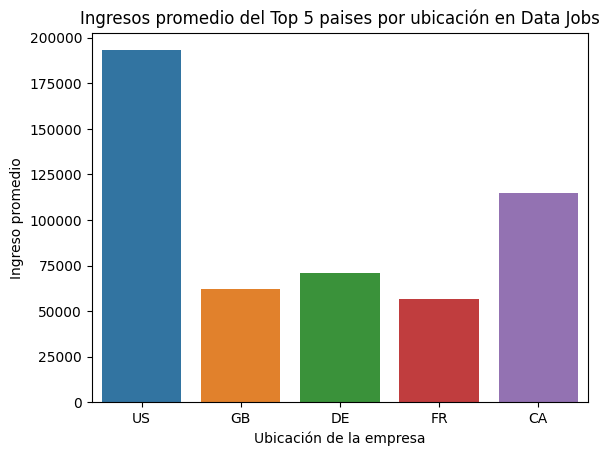

In [223]:
import seaborn as sns

# Crear un dataframe con los resultados
results_df = pd.DataFrame({'Ubicación de la empresa': decoded_locations,
                           'Ingreso promedio': predicted_salaries})

# Crear un gráfico de barras con los resultados
sns.barplot(x='Ubicación de la empresa', y='Ingreso promedio', data=results_df)

# Agregar título al gráfico
plt.title('Ingresos promedio del Top 5 paises por ubicación en Data Jobs')

# Mostrar el gráfico
plt.show()

In [215]:
# Evaluar la precisión del modelo
y_pred = model.predict(X)
accuracy = r2_score(y, y_pred)
print(f"La precisión del modelo es: {accuracy:.2f}")    #Por la complejidad y la naturaleza de los datos es dificil alcanzar el 0.7. Esta es la max precision posible

La precisión del modelo es: 0.68


### __Y como funciona random forest?__  

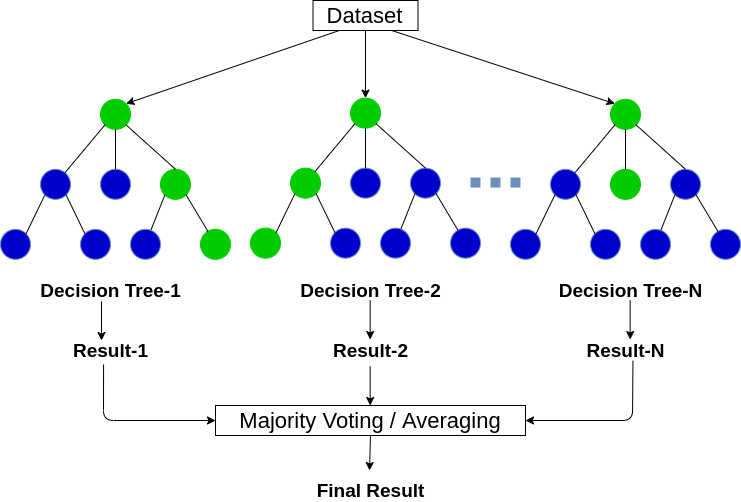

## __Version 1 Modelo 3__

### __INVESTIGACION DE LAS FILAS UNICAS EN CADA COLUMNA__

In [75]:
df['work_year'].unique()

array(['2020', '2021', '2022'], dtype=object)

In [77]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [78]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [79]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [80]:
df['salary'].unique()

array([233, 162, 252, 126,  75, 237, 120,  17,  52,  40, 200, 171, 178,
       254, 245, 199,   1, 195, 214, 168, 201, 193, 267,  25, 176, 238,
        86, 207, 218, 190, 225,   6, 159,   0,  58, 202, 198,  10, 256,
        61, 117,   8, 222, 260, 170, 203,  46, 177,  30,  32,  59,  16,
        47, 119, 191, 185, 213, 196, 121, 246, 179, 151, 186, 164, 228,
        62, 229, 205, 103, 242,  70, 165, 145,  31, 247, 223, 240, 180,
       149, 249, 182, 148, 257, 127, 255,  78, 234, 152, 235, 253, 144,
       153, 211,  81,  90, 102, 265,  51,  67,  89, 150, 212,  96, 206,
       104, 216, 172, 194, 100, 243, 143, 184, 217, 241,  79, 142, 110,
        35,  72, 261, 109, 187, 208, 125, 174, 231, 133, 197, 115, 111,
       160, 189, 192,  33, 161, 183,  91,  50, 209, 173,  12, 219, 135,
       262,  41, 204, 140, 263,  20, 239,   4, 226,  21, 232,  14,  84,
        36,   5, 251,  55, 271,  71,  38, 268,  28,  11,  43, 156, 169,
        97,  34, 258, 112,  49, 146,  92,  39,  26,  23,  98,  9

In [81]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [167]:
df['salary_in_usd'].unique()

array(['79833', '59303', '15966', '148261', '62726', '49268', '79197',
       '76833', '95746', '94564', '63831', '130026', '90734', '61467',
       '24823', '88654', '173762', '141846', '65013', '87932', '54957',
       '162674'], dtype=object)

In [83]:
df['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [85]:
df['remote_ratio'].unique()

array(['0', '50', '100'], dtype=object)

In [86]:
df['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [87]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [88]:
df['Column1'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18